In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import geopandas as gpd
import gdal
import os
import rasterio as rio
from rasterio.plot import show
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Importing data

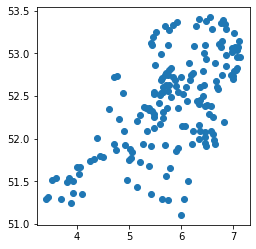

In [2]:
points_top_Soil = gpd.read_file('LUCAS_Topsoil_2015_20200323-shapefile/LUCAS_Topsoil_2015_20200323.shp')
NLD_boundaries = gpd.read_file('NLD_shapefile/gadm36_NLD_0.shp')

# Select by location based on the boundaries of teh Netherlands
# Firstly, I checked if the two files have the same epsg
NLD_boundaries.crs == NLD_boundaries.crs
polygon_NLD = NLD_boundaries.geometry[0]
points_NLD = points_top_Soil[points_top_Soil.within(polygon_NLD)]
points_NLD.plot()
#os.makedirs("top_soil_NLD")
points_NLD.to_file('top_soil_NLD/top_soil_NLD.shp')

In [8]:
interpolated_clay = gdal.Grid('top_soil_NLD/interpolation_clay_sand_silt/interpolated_clay.tiff', 'top_soil_NLD/top_soil_NLD.shp', zfield='Clay', algorithm = 'linear:radius=0')
interpolated_sand = gdal.Grid('top_soil_NLD/interpolation_clay_sand_silt/interpolated_sand.tiff', 'top_soil_NLD/top_soil_NLD.shp', zfield='Sand', algorithm = 'linear:radius=0')
interpolated_silt = gdal.Grid('top_soil_NLD/interpolation_clay_sand_silt/interpolated_silt.tiff', 'top_soil_NLD/top_soil_NLD.shp', zfield='Silt', algorithm = 'linear:radius=0')

In [9]:
cwd = os.getcwd()
data_path = os.path.join(cwd, 'top_soil_NLD\interpolation_clay_sand_silt')

In [10]:
images = []
arrays_table= []

for i in os.listdir(data_path):
    path_file= os.path.join(data_path, i)
    file = rio.open(path_file)
    mask_file = file.read_masks(1)
    data_mask = np.ma.masked_array(file.read(1), mask_file==0)
    images.append(file)
    arrays_table.append(data_mask)

# Ploting soil content percentages

Text(-0.35, -0.1, 'Soil content')

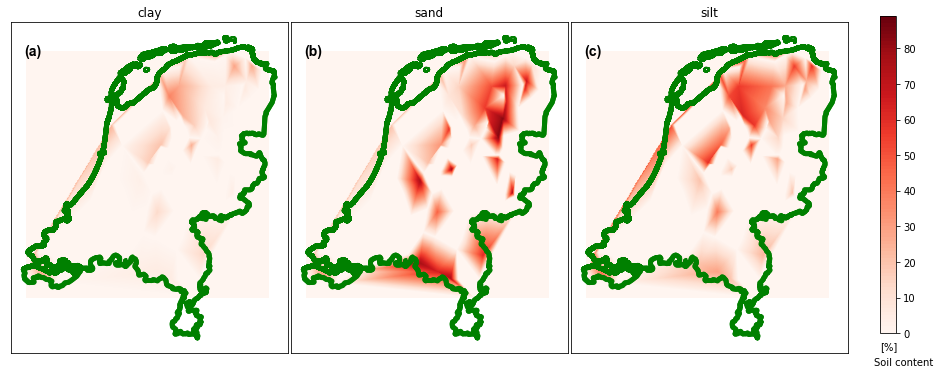

In [17]:
fig, axs = plt.subplots(1,3,figsize=(15,8))
labels_font = {'fontname':'Arial', 'size':'14', 'weight':'bold'}

fig.subplots_adjust(hspace = .15, wspace=.011)
soil_types = ['clay', 'sand', 'silt']
letters = ['a','b', 'c']
axs = axs.ravel()

for i in range(3):
    rio.plot.show(images[i], ax=axs[i],  cmap='Reds', vmin=0, vmax=90)
    NLD_boundaries.plot(ax=axs[i], facecolor='none', edgecolor='green', linewidth=5)
    axs[i].invert_yaxis()
    NLD_boundaries.plot(ax=axs[i], facecolor='none', edgecolor='green', linewidth=5)
    axs[i].set_yticklabels([])
    axs[i].set_xticklabels([])
    axs[i].set_yticks([])
    axs[i].set_xticks([])
    axs[i].set_title(soil_types[i])
    axs[i].text(0.05, 0.9, '('+str(letters[i])+')', **labels_font, transform=axs[i].transAxes)

# Plotling the colorbar
cbar_ax = fig.add_axes([0.93, 0.25, 0.015, 0.55])
sm = plt.cm.ScalarMappable(cmap='Reds')
colorbar = fig.colorbar(sm, cax=cbar_ax, ticks=range(0,1), boundaries=np.arange(0, 90), fraction=0.049)
colorbar.set_ticks(np.arange(0, 100, 10))
plt.text(0, -0.05, '[%]', transform=cbar_ax.transAxes)
plt.text(-0.35, -0.10, 'Soil content', transform=cbar_ax.transAxes)